<br>

## CLASSIFICATION WITH R - PREDICTING BRAND PREFERENCES

<br>
<br>
<br>
A market research firm conducted a survey of our existing customers about their brand
preference "Sony" or "Acer".
<br>
<br>
10.000 interviews returned fully answered and 5.000 not fully answered.
<br>
<br>
TASK: Using complete interviews to predict open answers for incomplete interviews.
<br>
<br>

<br>


Version 1.2

Author: Steffen Adolf

Date: 06-13-2019

----------------------------------------------------------------------------------



### Libraries

In [11]:
#loading libraries

library(caret)
library(mlbench)
library(dplyr)
library(plyr)
library(corrplot)


### Reading Data

In [12]:
#reading data sets 

Survey <- read.csv('CompleteResponses.csv')

SurveyIncomplete <- read.csv('SurveyIncomplete.csv')

### Data Overview

In [13]:
head(Survey)

salary,age,elevel,car,zipcode,credit,brand
119806.54,45,0,14,4,442037.71,0
106880.48,63,1,11,6,45007.18,1
78020.75,23,0,15,2,48795.32,0
63689.94,51,3,6,5,40888.88,1
50873.62,20,3,14,4,352951.50,0
130812.74,56,3,14,3,135943.02,1


In [14]:
str(Survey)

'data.frame':	9898 obs. of  7 variables:
 $ salary : num  119807 106880 78021 63690 50874 ...
 $ age    : int  45 63 23 51 20 56 24 62 29 41 ...
 $ elevel : int  0 1 0 3 3 3 4 3 4 1 ...
 $ car    : int  14 11 15 6 14 14 8 3 17 5 ...
 $ zipcode: int  4 6 2 5 4 3 5 0 0 4 ...
 $ credit : num  442038 45007 48795 40889 352951 ...
 $ brand  : int  0 1 0 1 0 1 1 1 0 1 ...


In [15]:
summary(Survey)

     salary            age            elevel           car       
 Min.   : 20000   Min.   :20.00   Min.   :0.000   Min.   : 1.00  
 1st Qu.: 52082   1st Qu.:35.00   1st Qu.:1.000   1st Qu.: 6.00  
 Median : 84950   Median :50.00   Median :2.000   Median :11.00  
 Mean   : 84871   Mean   :49.78   Mean   :1.983   Mean   :10.52  
 3rd Qu.:117162   3rd Qu.:65.00   3rd Qu.:3.000   3rd Qu.:15.75  
 Max.   :150000   Max.   :80.00   Max.   :4.000   Max.   :20.00  
    zipcode          credit           brand       
 Min.   :0.000   Min.   :     0   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:120807   1st Qu.:0.0000  
 Median :4.000   Median :250607   Median :1.0000  
 Mean   :4.041   Mean   :249176   Mean   :0.6217  
 3rd Qu.:6.000   3rd Qu.:374640   3rd Qu.:1.0000  
 Max.   :8.000   Max.   :500000   Max.   :1.0000  

### Data Preparation

In [16]:
#convert data type to factor

Survey$elevel <- as.factor(Survey$elevel)

Survey$car <- as.factor(Survey$car)

Survey$zipcode <- as.factor(Survey$zipcode)

Survey$brand <- as.factor(Survey$brand)

In [17]:
#order ordinal factors

Survey$elevel <- factor(Survey$elevel, order = TRUE,
                 levels = c('0', '1', '2', '3', '4'))

In [18]:
#rename factor levels for education ('elevel')

levels(Survey$elevel) <- c( "Less than High School Degree","High School Degree",
                            "Some College", "4-Year College Degree",
                            "Masters or Professional Degree")

In [19]:
#only region "4" and "5" represent company's customers

Survey <- filter(Survey, zipcode=='4'|zipcode=='5')

### Data Exploration

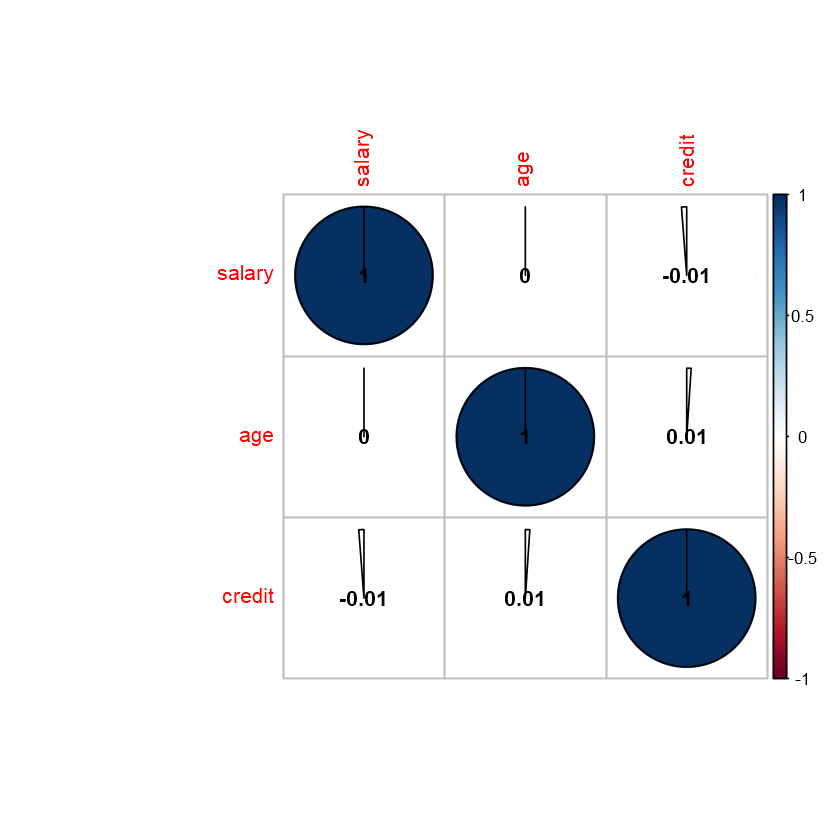

In [20]:
#Correlation Matrix

# -> no correlation between salary and age, salary and credit, age and credit
# -> implausible -> data quality of Survey in question?

num.cols <- sapply(Survey, is.numeric) 

cor.data <- cor(Survey[,num.cols])

corrplot(cor.data,method='pie',addCoef.col = TRUE,cl.length = 5)


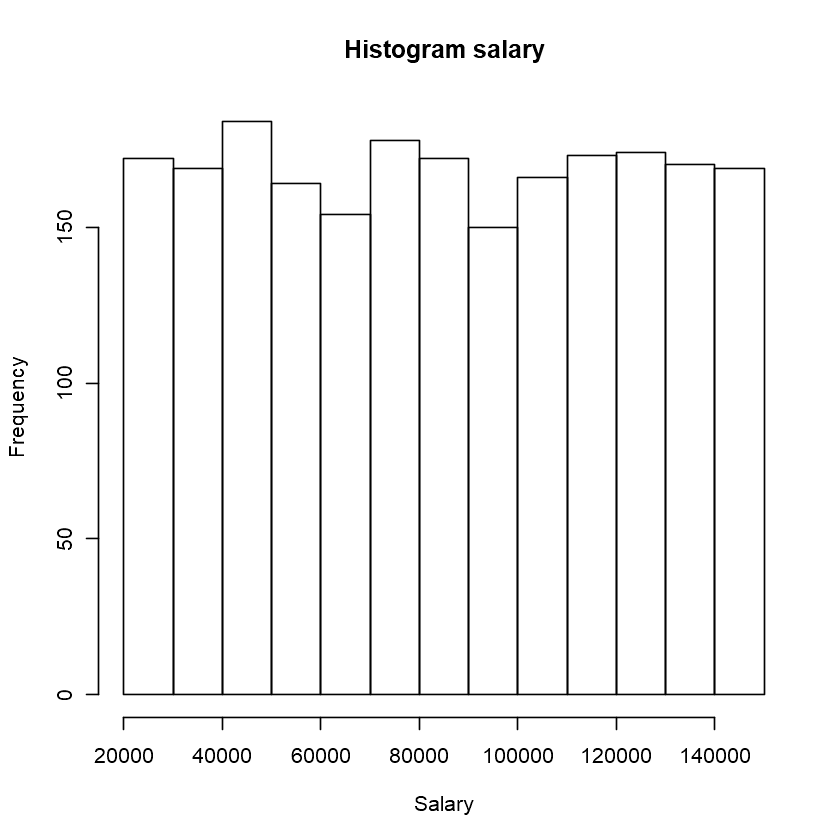

In [21]:
#Visualisations

#Histogram -> uniform distribution of features, data quality of Survey in doubt

hist(Survey$salary, main = "Histogram salary",xlab="Salary")

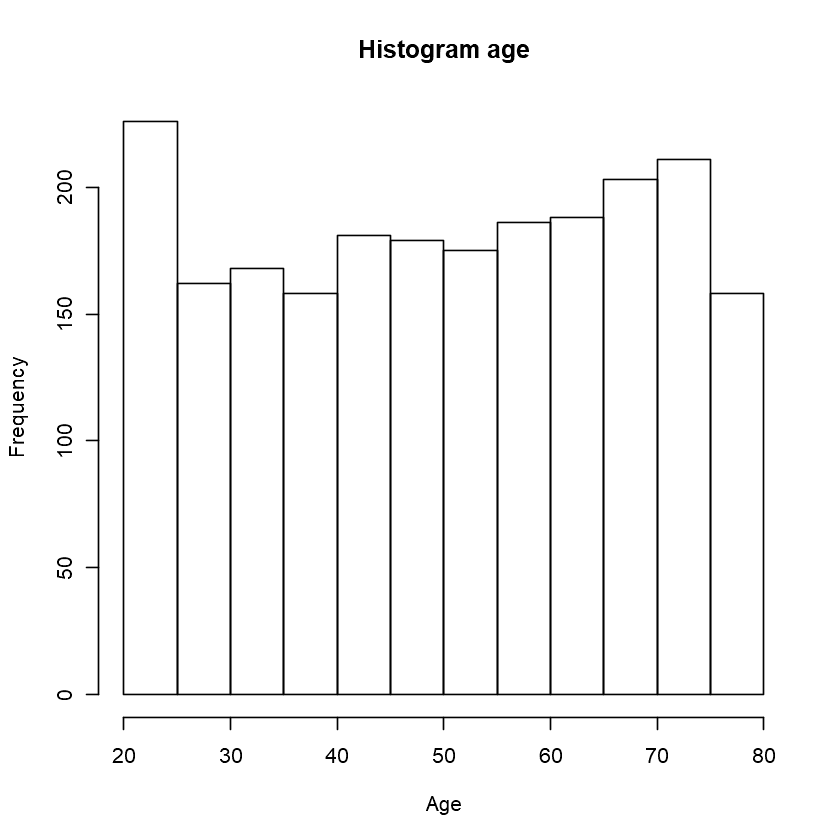

In [22]:
hist(Survey$age, main = "Histogram age",xlab="Age")

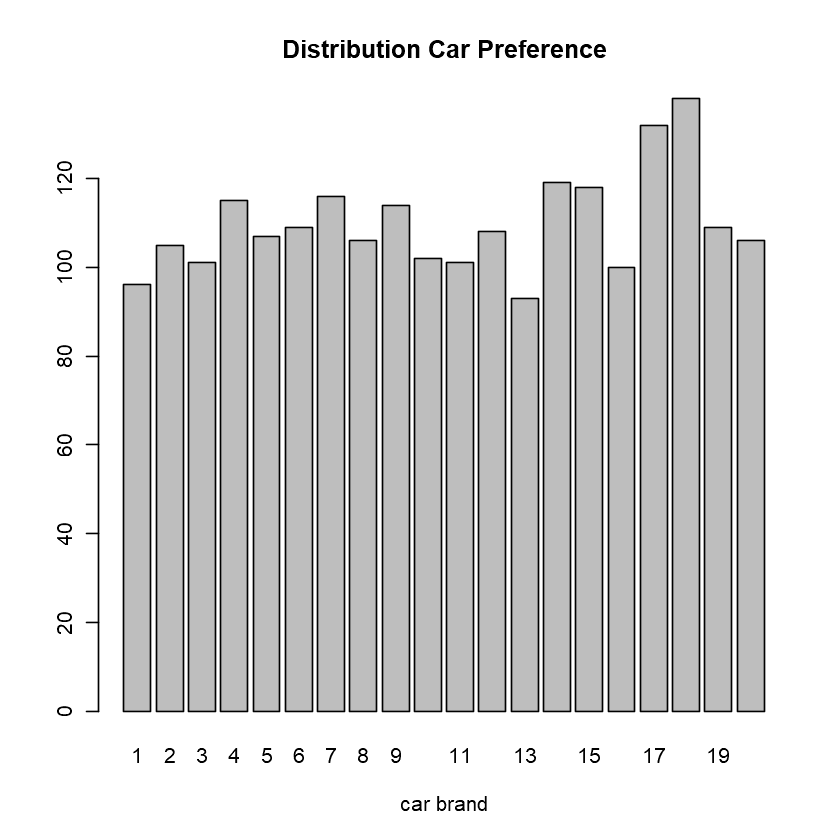

In [23]:
plot(Survey$car, main= "Distribution Car Preference", xlab="car brand")

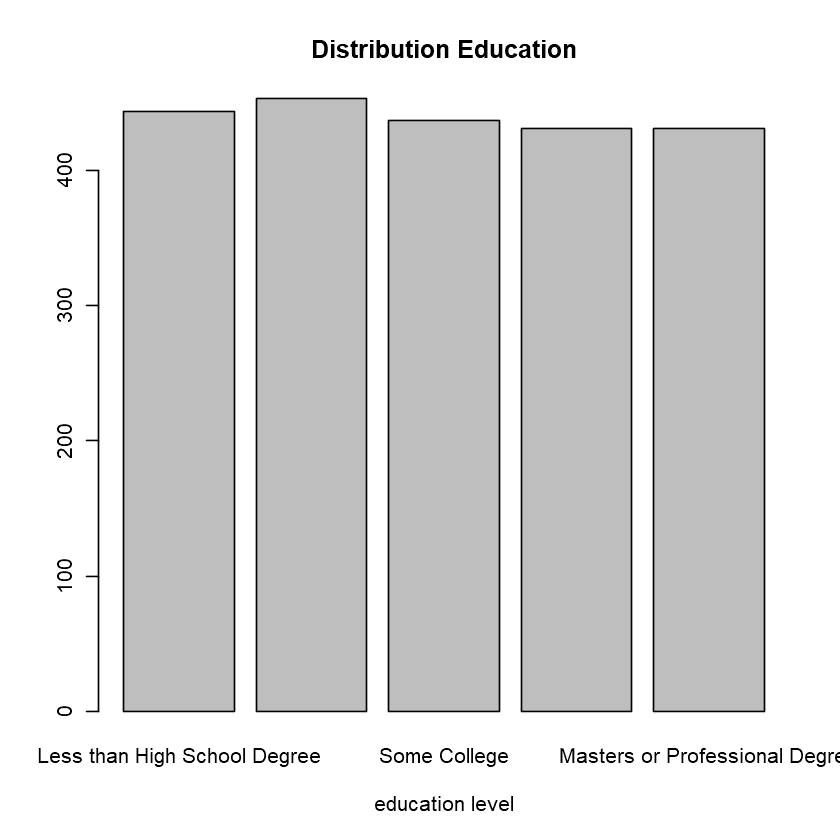

In [24]:
plot(Survey$elevel,main="Distribution Education", xlab="education level")

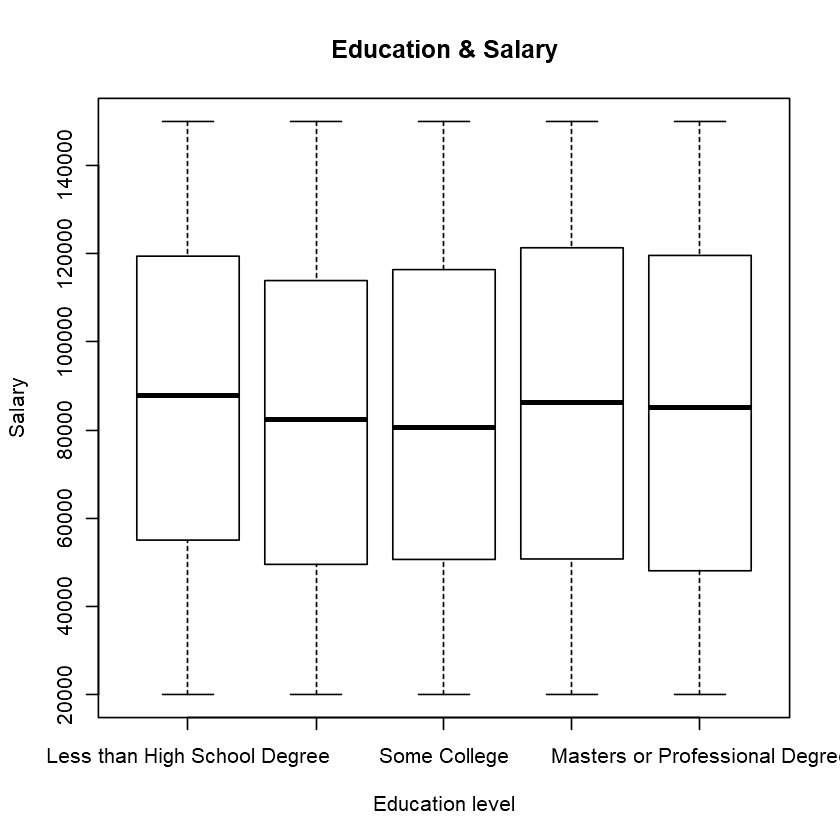

In [25]:
#boxplot salary & education 
# -> no correlation between education level and salary, data quality of Survey in doubt

plot( Survey$elevel, Survey$salary,'h',main = "Education & Salary",
      xlab = "Education level", ylab = "Salary")

### Building and Training Model

In [26]:
#data partition, 75 % training data, 25% test data

set.seed(123)

inTrain <- createDataPartition(y=Survey$brand, p=0.75, list=FALSE)

training<-Survey[inTrain,]

testing<-Survey[-inTrain,]


In [27]:
#model training, using "caret" package

#cross validation with 3 repeats

ctrl <- trainControl(method='repeatedcv', repeats=3)  

In [28]:
#training "C5.0" model with tuneLength = 5

options(warn=-1)

C5fit <- train( brand ~ ., data = training, method = 'C5.0',
                tuneLength = 5, trControl = ctrl)

In [29]:
#model testing

options(warn=0)

c5predict <- predict(C5fit,newdata=testing)

confusionMatrix(data=c5predict,testing$brand)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 184  26
         1  24 314
                                          
               Accuracy : 0.9088          
                 95% CI : (0.8815, 0.9315)
    No Information Rate : 0.6204          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8066          
                                          
 Mcnemar's Test P-Value : 0.8875          
                                          
            Sensitivity : 0.8846          
            Specificity : 0.9235          
         Pos Pred Value : 0.8762          
         Neg Pred Value : 0.9290          
             Prevalence : 0.3796          
         Detection Rate : 0.3358          
   Detection Prevalence : 0.3832          
      Balanced Accuracy : 0.9041          
                                          
       'Positive' Class : 0               
                              

In [30]:
#variable importance of model

varImp(C5fit,metric='usage')

C5.0 variable importance

  only 20 most important variables shown (out of 34)

         Overall
salary    100.00
car15     100.00
age        83.55
car11      71.89
car2       51.43
car20       6.50
car17       6.13
car18       4.07
car6        1.03
car7        0.61
car10       0.55
zipcode8    0.00
credit      0.00
car4        0.00
zipcode7    0.00
car3        0.00
car9        0.00
elevel.L    0.00
car5        0.00
zipcode1    0.00

In [31]:
#Random Forest" model with "mtry" between 5 and 10

RFgrid <- expand.grid(mtry =c(5:10))

rffit <- train(brand~.,data=training,method='rf',tuneGrid=RFgrid,trControl=ctrl)

In [32]:
#testing model

rfpredict <- predict(rffit,newdata=testing)

confusionMatrix(data=rfpredict,testing$brand)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 179  23
         1  29 317
                                          
               Accuracy : 0.9051          
                 95% CI : (0.8774, 0.9283)
    No Information Rate : 0.6204          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7974          
                                          
 Mcnemar's Test P-Value : 0.4881          
                                          
            Sensitivity : 0.8606          
            Specificity : 0.9324          
         Pos Pred Value : 0.8861          
         Neg Pred Value : 0.9162          
             Prevalence : 0.3796          
         Detection Rate : 0.3266          
   Detection Prevalence : 0.3686          
      Balanced Accuracy : 0.8965          
                                          
       'Positive' Class : 0               
                              

In [34]:
#variable importance

varImp(rffit)

rf variable importance

  only 20 most important variables shown (out of 34)

         Overall
salary   100.000
age       50.979
credit    22.943
elevel.L   3.969
elevel.C   3.668
elevel^4   3.464
elevel.Q   2.274
zipcode4   2.214
zipcode5   2.158
car15      1.772
car4       1.474
car20      1.431
car11      1.417
car18      1.390
car17      1.310
car10      1.291
car2       1.270
car9       1.254
car8       1.253
car3       1.247


Call:
summary.resamples(object = resamps)

Models: C5, rf 
Number of resamples: 30 

Accuracy 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
C5 0.7195122 0.8172949 0.8905765 0.8692249 0.9151515 0.9573171    0
rf 0.8554217 0.8801275 0.9030303 0.9010269 0.9132483 0.9578313    0

Kappa 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
C5 0.3920052 0.6299122 0.7656974 0.7284952 0.8223976 0.9095208    0
rf 0.6911149 0.7467910 0.7935604 0.7898665 0.8128933 0.9112842    0



Call:
summary.diff.resamples(object = diffs)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

Accuracy 
   C5      rf     
C5         -0.0318
rf 0.02371        

Kappa 
   C5     rf      
C5        -0.06137
rf 0.0298         


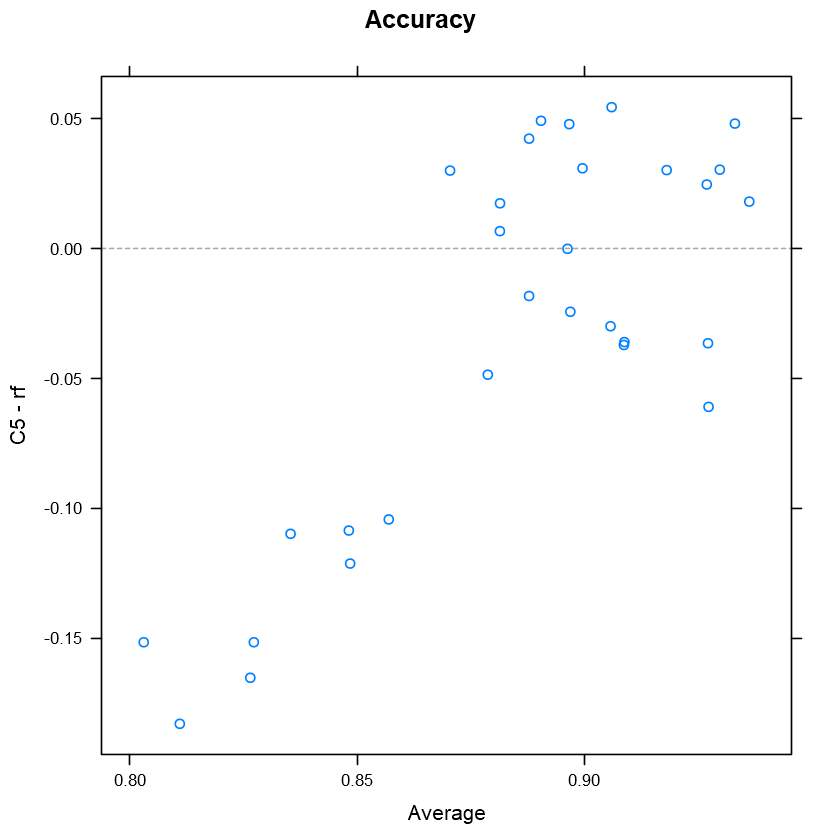

In [36]:
# comparing model performance 

resamps <- resamples(list(C5 = C5fit, rf = rffit))

summary(resamps)

xyplot(resamps, what = "BlandAltman")

diffs <- diff(resamps)

summary(diffs)

### Making Predictions with "Random Forest" model


In [37]:
#data preparation for new data

#convert data type to factor

SurveyIncomplete$elevel <- as.factor(SurveyIncomplete$elevel)

SurveyIncomplete$car <- as.factor(SurveyIncomplete$car)

SurveyIncomplete$zipcode <- as.factor(SurveyIncomplete$zipcode)

SurveyIncomplete$brand <- as.factor(SurveyIncomplete$brand)


In [38]:
#excluding irrelevant regions

SurveyIncomplete<-filter(SurveyIncomplete,zipcode==4 | zipcode==5)

In [39]:
#order level of ordinal feature "elevel"

SurveyIncomplete$elevel <- factor(SurveyIncomplete$elevel, order = TRUE,
                            levels = c('0', '1', '2', '3', '4'))

In [40]:
#rename factor levels for education ('elevel')

levels(SurveyIncomplete$elevel) <- c("Less than High School Degree", 
                                     "High School Degree",
                                     "Some College",
                                     "4-Year College Degree",
                                     "Masters or Professional Degree")


In [41]:
#making predictions with new data

prediction.brands <- predict(rffit,newdata=SurveyIncomplete)

In [42]:
#Join both data sets

SurveyIncomplete <- cbind(SurveyIncomplete, prediction.brands)

SurveyIncomplete <- SurveyIncomplete[,-7]

#rename label before joining

names(SurveyIncomplete)[7] <- "brand"

Complete.Survey <- rbind(Survey, SurveyIncomplete)

In [43]:
#change level names to "Acer" and "Sony"

levels(Complete.Survey$brand) <- c("Acer", "Sony")

### Results


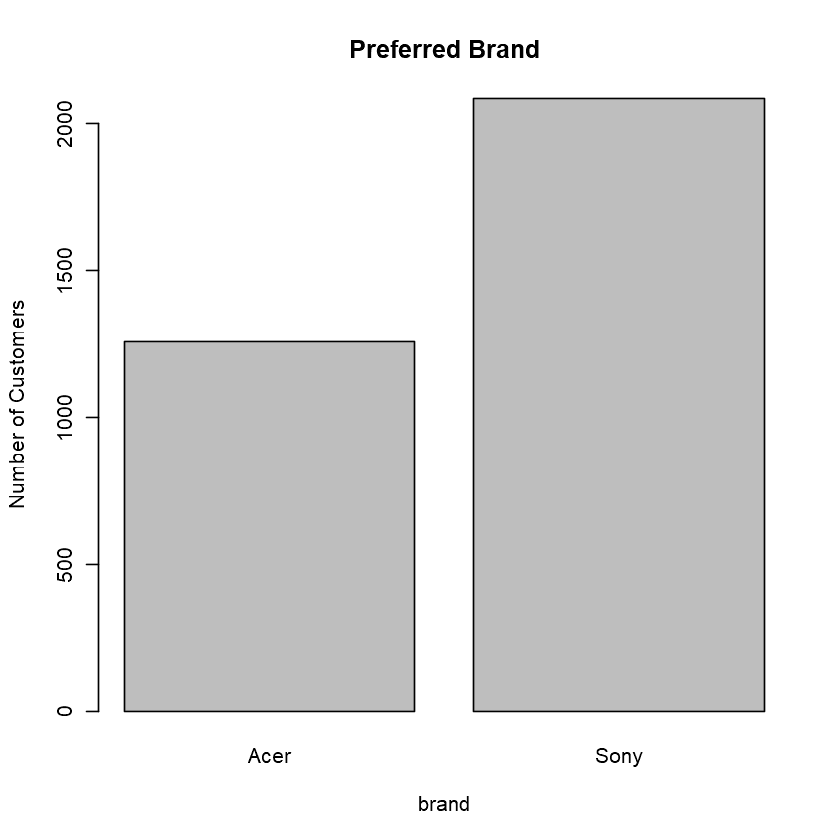

In [44]:
#Majority of customers prefer "Sony" as a brand compared to "Sony"

plot(Complete.Survey$brand,xlab='brand',ylab='Number of Customers',main='Preferred Brand')

A majority of Blackwell's customers prefer Sony as a brand compared to Acer.